## Описание алгоритма стохастического градиентного спуска

Данный код реализует алгоритм стохастического градиентного спуска (SGD) для аппроксимации функции $f(x) = 0.5 \cdot x^2 - 0.1 \cdot \frac{1}{e^{-x}} + 0.5 \cdot \cos(2x) - 2$ на интервале $[-5, 5]$ моделью вида $a(x) = w_0 + w_1 \cdot x + w_2 \cdot x^2 + w_3 \cdot \cos(2x) + w_4 \cdot \sin(2x)$.

**Цель:** Найти вектор параметров $w = [w_0, w_1, w_2, w_3, w_4]^T$, минимизирующий функцию потерь.

**Функция потерь (квадратичная ошибка для одного наблюдения):**

$$L_i(w) = (a(x_i, w) - y_i)^2 = (w^T \cdot x_i - y_i)^2$$

где:
- $i$ - случайно выбранный индекс наблюдения из обучающей выборки.
- $a(x_i, w)$ - значение модели в точке $x_i$ с текущими параметрами $w$.
- $y_i$ - истинное значение функции в точке $x_i$.

**Алгоритм стохастического градиентного спуска (SGD):**

Параметры $w$ обновляются итеративно по следующей формуле:

$$w_n = w_{n-1} - \eta \cdot \frac{\partial L_i(w)}{\partial w}$$

где:
- $w_n$ - вектор параметров на текущей итерации.
- $w_{n-1}$ - вектор параметров на предыдущей итерации.
- $\eta$ - шаг обучения (learning rate).
- $\frac{\partial L_i(w)}{\partial w}$ - градиент функции потерь по вектору параметров $w$ для случайно выбранного наблюдения $i$.

**Градиент функции потерь для одного наблюдения:**

Производная функции потерь по вектору параметров $w$ для i-го наблюдения:

$$\frac{\partial L_i(w)}{\partial w} = 2 \cdot (w^T \cdot x_i - y_i) \cdot x_i^T$$

где $x_i = [1, x, x^2, \cos(2x), \sin(2x)]^T$ - вектор признаков для i-го наблюдения.

**Матрица признаков X:**

Матрица признаков $X$ формируется таким образом, что каждая строка соответствует одной точке данных $x_i$ из интервала $[-5, 5]$. Столбцы матрицы содержат значения признаков для каждой точки, а именно:

- Первый столбец: константа 1 (для члена $w_0$)
- Второй столбец: значение $x_i$
- Третий столбец: значение $x_i^2$
- Четвертый столбец: значение $\cos(2x_i)$
- Пятый столбец: значение $\sin(2x_i)$

Таким образом, матрица $X$ имеет размерность $n \times 5$, где $n$ - количество точек в выборке.

**Скользящее среднее ошибки:**

Для отслеживания сходимости в процессе обучения используется экспоненциальное скользящее среднее ошибки. На каждой итерации $i$, после вычисления ошибки $loss_i$ для текущего случайно выбранного наблюдения, скользящее среднее $Qe_i$ обновляется по формуле:

$$Qe_i = \lambda \cdot loss_i + (1 - \lambda) \cdot Qe_{i-1}$$

где:
- $Qe_i$ - текущее значение скользящего среднего ошибки.
- $loss_i$ - ошибка на текущей итерации для выбранного наблюдения.
- $\lambda$ (`lm` в коде) - параметр сглаживания, определяющий "вес" текущей ошибки по сравнению с предыдущим средним.

**Реализация в коде:**

1.  Инициализируются начальные значения параметров $w$, шаги обучения $\eta$ и параметр сглаживания `lm` для скользящего среднего ошибки.
2.  Создается матрица признаков $X$, включающая полиномиальные и тригонометрические члены.
3.  В цикле, выполняющем $N$ итераций (эпох):
    - Случайно выбирается одно наблюдение из выборки (`k = np.random.randint(0, sz)`).
    - Вычисляется градиент функции потерь для этого одного наблюдения (`gradient_k`).
    - Параметры $w$ обновляются с учетом шага обучения и вычисленного градиента (`w -= eta * gradient_k`).
    - Вычисляется ошибка для текущего наблюдения (`loss_k`) и обновляется скользящее среднее ошибки (`Qe`).
4.  После завершения итераций вычисляется и выводится итоговая среднеквадратичная ошибка ($Q$) для всей выборки, а также последнее значение скользящего среднего ошибки ($Qe$).

Итоговые веса (w):
[[-1.55870287]
 [-0.77127223]
 [ 0.28664769]
 [ 0.8162054 ]
 [-0.14011833]]

Итоговая среднеквадратичная ошибка (Q):
1.4323446928853572

Последнее значение скользящего среднего ошибки (Qe):
1.3168521492889735


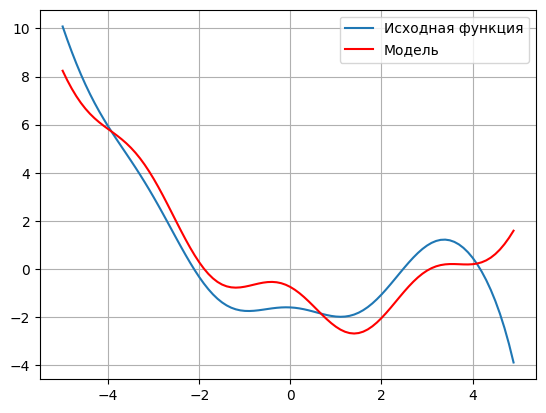

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

np.random.seed(0)  # генерация одинаковых последовательностей псевдослучайных чисел

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x**2 - 0.1 * 1 / np.exp(-x) + 0.5 * np.cos(2 * x) - 2.


# подготовка данных
coord_x = np.arange(-5.0, 5.0, 0.1).reshape(-1, 1)  # значения по оси X
coord_y = func(coord_x).reshape(-1, 1)               # значения по оси Y

sz = len(coord_x)  # количество точек
eta = np.array([0.01, 0.001, 0.0001, 0.01, 0.01]).reshape(-1, 1)  # шаги обучения
w = np.zeros((5, 1))  # начальные веса
N = 500               # число итераций
lm = 0.02             # лямбда для скользящего среднего

# матрица признаков (1, x, x^2, cos(2x), sin(2x))
X = np.hstack((
    np.ones_like(coord_x),
    coord_x,
    coord_x**2,
    np.cos(2 * coord_x),
    np.sin(2 * coord_x)
))

# начальная среднеквадратичная ошибка
Qe = np.mean((X @ w - coord_y)**2)

# Настройка графика
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(coord_x, coord_y, label='Исходная функция')
approx = ax.plot(coord_x, X @ w, c="red", label='Модель')[0]
ax.legend()

# стохастический градиентный спуск
for i in range(N):
    k = np.random.randint(0, sz)
    x_k = X[k].reshape(1, -1)   # (1, 5)
    y_k = coord_y[k, 0]         # скаляр

    # градиент для одного наблюдения
    gradient_k = 2 * (x_k @ w - y_k) * x_k.T  # (5, 1)

    # обновление весов (поэлементно с разными eta)
    w -= eta * gradient_k

    # обновление ошибки Qe
    loss_k = ((x_k @ w - y_k)**2).item() # скаляр
    Qe = lm * loss_k + (1 - lm) * Qe

    # Обновление данных для графика (без отображения)
    if i % 10 == 0: # Обновляем данные каждые 10 итераций
        approx.set_ydata(X @ w)


Q = np.mean((X @ w - coord_y)**2)
print("Итоговые веса (w):")
print(w)
print("\nИтоговая среднеквадратичная ошибка (Q):")
print(Q)
print("\nПоследнее значение скользящего среднего ошибки (Qe):")
print(Qe)

plt.show() # Отображение финального графика